# Project 1 (ARMA and MSE)
## Name: Lixia

(a) Load the time series data from the ‘xt.csv’ file. Plot the time series. Create a transformation $y_t$ of the original time series $x_t$ as follows: $y_t=\sqrt{x_t}$. Include the title "yt from 1700 to 2018," x-label "Year," and y-label "$yt" (Hint: yt = np.sqrt(xt))

  
(b) Separate the data set into two parts: training data are from 1700-2008 and testing data are from 2009-2018. 
Create a variable "yt_train" for training data and another variable "yt_test" for testing data. 


(c) Plot ACF and PACF of yt_train for lags 0 through 60.

(d) Based on (c), decide which ARMA model you use to fit the training data, e.g. ARMA(1,0), ARMA(1,1), etc.

(e) Estimate the ARMA model you decide in (d) with the training data "yt_train".
    
(f) Use the estimated model you obtained in (e) to forecast the last 10 observations of $y_t$ (i.e 2009-2018 observations). Show the forecasted values. 

(g) Compute the mean squared error (MSE) for the forecasted xt (2009-2018). 



SOLUTION:

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

(a)

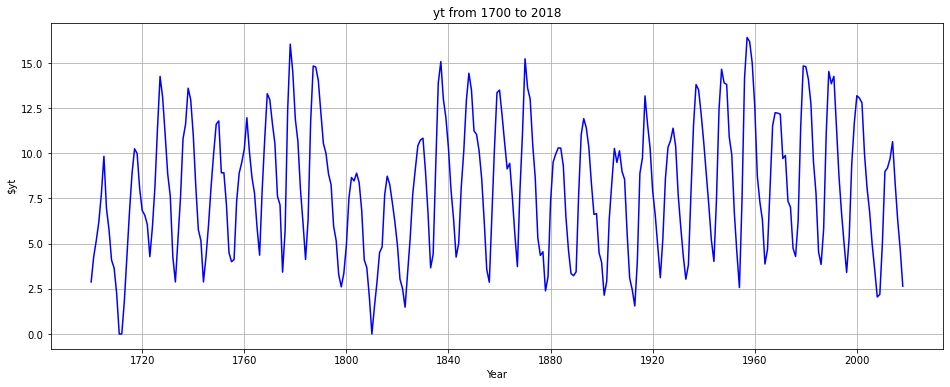

In [14]:
xt = pd.read_csv('xt.csv', parse_dates=['year'],index_col='year')
yt=np.sqrt(xt)
plt.figure(figsize=(16,6))
plt.plot(yt, linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('$yt')
plt.title('yt from 1700 to 2018')
plt.grid(True)
plt.show()

(b)

In [15]:
yt

,xt
year,
1700-01-01,2.880972
1701-01-01,4.277850
1702-01-01,5.167204
1703-01-01,6.188699
1704-01-01,7.745967
...,...
2014-01-01,10.644247
2015-01-01,8.354639
2016-01-01,6.308724


In [16]:
yt_train=yt[0:309]
yt_test=yt[309:319]

(c)

[ 1.          0.81954936  0.44934982  0.03500989 -0.29365426 -0.47025732
 -0.44837025 -0.24176424  0.07237015  0.40626705  0.6318131   0.66668352
  0.50317175  0.21121521 -0.09259344 -0.32353926 -0.42518942 -0.38438298
 -0.22593624  0.00828148  0.24029179  0.39852285  0.41560041  0.28757795
  0.05911662 -0.18203783 -0.36354441 -0.43271447 -0.37160744 -0.21541654
 -0.00799463  0.18494384  0.2940868   0.28088814  0.15433524 -0.03862045
 -0.23280992 -0.35280115 -0.37253374 -0.29190313 -0.1406289 ]


<function matplotlib.pyplot.show(close=None, block=None)>

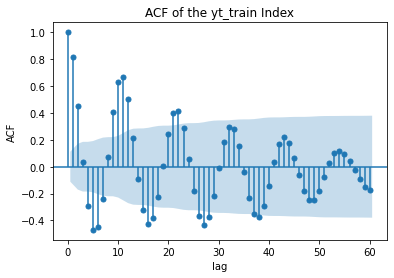

In [17]:
result = acf(yt_train)
print(result)


plot_acf(yt_train,lags = 60)
plt.xlabel("lag")
plt.ylabel("ACF")
plt.title("ACF of the yt_train Index")
plt.show

[ 1.          0.82221024 -0.69065736 -0.15038829 -0.00909807 -0.05047651
  0.1941288   0.22067015  0.16642425  0.30484619  0.01022645 -0.04342823
 -0.02781274 -0.04849056  0.10117914 -0.04701519 -0.08677951 -0.0741325
 -0.15291657  0.03425387  0.00185407  0.04573332 -0.04153512 -0.0995045
 -0.10904768 -0.01607706 -0.06317019  0.06638978  0.05186085 -0.08332673
  0.03123642 -0.03227956 -0.06456765  0.04337709 -0.00161615 -0.01711714
 -0.02004664  0.02414528 -0.05438505  0.01369137  0.00991355]


<function matplotlib.pyplot.show(close=None, block=None)>

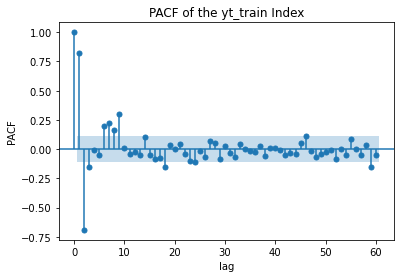

In [18]:
result = pacf(yt_train)
print(result)


plot_pacf(yt_train,lags = 60)
plt.xlabel("lag")
plt.ylabel("PACF")
plt.title("PACF of the yt_train Index")
plt.show

(d)

In [19]:
#ARMA(36,0,29)

(e)

In [20]:
p =36
model = ARIMA(yt_train, order=(p,0,29))
model_fit = model.fit(method='css')
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                     xt   No. Observations:                  309
Model:                   ARMA(36, 29)   Log Likelihood                -404.341
Method:                           css   S.D. of innovations              1.064
Date:                Thu, 24 Nov 2022   AIC                            942.681
Time:                        16:01:02   BIC                           1184.516
Sample:                    01-01-1736   HQIC                          1039.759
                         - 01-01-2008                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1917      0.090     90.610      0.000       8.015       8.369
ar.L1.xt       0.3620        nan        nan        nan         nan         nan
ar.L2.xt       0.2746      0.142      1.932      0.0

(f)

In [21]:
# forecast m steps ahead starting from n+1
m=10
yt_forecasted = model_fit.predict(start=309, end=318)
yt_forecasted
xt=yt**2
xt_forecasted=yt_forecasted**2
xt_forecasted
xt_test=yt_test**2
xt_test

,xt
year,
2009-01-01,4.8
2010-01-01,24.9
2011-01-01,80.8
2012-01-01,84.5
2013-01-01,94.0
2014-01-01,113.3
2015-01-01,69.8
2016-01-01,39.8
2017-01-01,21.7


In [22]:
xt_forecasted

2009-01-01     12.616173
2010-01-01     28.386306
2011-01-01     63.161440
2012-01-01     89.480860
2013-01-01    101.924835
2014-01-01    112.631657
2015-01-01     73.289682
2016-01-01     37.256163
2017-01-01     10.801033
2018-01-01      1.532706
Freq: AS-JAN, dtype: float64

(g)

In [23]:
from sklearn.metrics import mean_squared_error
 
MSE = mean_squared_error(xt_test,xt_forecasted)
#MSE = np.square(np.subtract(xt_test,xt_forecasted)).mean()
MSE

63.9752128126539